# Uber Data Analysis

__Introduction__

Uber is the multinational transportation network company that operates a plateform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-halling service. Uber allows users to request a ride from their current location to desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (Standard Car), UberXL (Larger Vahicles), UberBlack (Luxury Vahicles), and UberPool (shared rides with other passengers travelling in the same direction). The fares for rides are calculated based on factors such as distance travelled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for  its convenience, ease of use, and competitive pricing compared to traditionall taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect).

__Objective__

1) Understand Ride Patterns: Investigate the pattern and dtrends in ride data to uncover key metrics such as averagee ride duration, ride frequency, and distance traveled.

2) Identify Popular Categories : Explore the popularity of different ride categories, examining which types of rides are most prevalent ammmong users.

3) Temporal Analysis: Analyze temporal aspects of ride-sharing, includeing variations in ride volume and user behaviour across different timescales, such as days of the week and hours of the day.

4) User Segmentation: Segment users based on relevent characteristics and explore how different user groups interact with the ride-sharing service.

5) Uncover Challenges And opportunities: Identify challenges and limitations in the dataset, acknowledging potential biases, and highlight opportunities for improvement or further investigation.

#### Importing Necessory Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Importing Data

In [2]:
data = pd.read_csv('UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


#### Exploratory Data Analysis

In [4]:
data.shape

(1156, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


#### Data Cleaning

`Start Date` and `End Date` in not in proper formmat. We will replace  it and arrenge it in proper format.

In [8]:
data['START_DATE'] = data['START_DATE'].str.replace('/','-')

In [9]:
data['END_DATE'] = data['END_DATE'].str.replace('/','-')

In [10]:
# Treating Null Values
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [12]:
data = data.applymap(lambda x: "NA" if str(x).strip() == "" else x)

In [13]:
data['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

All the values in the last row contain `NA` values, we will remove that row as it is unnecessory

In [14]:
data = data.drop(data.index[-1])

In [15]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12-31-2016 1:07,12-31-2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12-31-2016 13:24,12-31-2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12-31-2016 15:03,12-31-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12-31-2016 21:32,12-31-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12-31-2016 22:08,12-31-2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In addition we are replacing `Kar?chi` to `Karachi` in START and STOP columns

In [16]:
data['START'] = data['START'].replace('Kar?chi', 'Karachi')

In [17]:
data['STOP'] = data['STOP'].replace('Kar?chi', 'Karachi')

In [18]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12-31-2016 1:07,12-31-2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12-31-2016 13:24,12-31-2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12-31-2016 15:03,12-31-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12-31-2016 21:32,12-31-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12-31-2016 22:08,12-31-2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [19]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format = '%m-%d-%Y %H:%M')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], format = '%m-%d-%Y %H:%M')

In [20]:
data['DAY_OF_WEEK'] = data['START_DATE'].dt.day_name()
data['TIME_OF_DAY'] = data['START_DATE'].dt.hour

In [21]:
data['DURATION'] = data['END_DATE'] - data['START_DATE']

In [22]:
data.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY_OF_WEEK,TIME_OF_DAY,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,21,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday,1,0 days 00:12:00


In [23]:
avg_duration = data['DURATION'].mean()
avg_duration

Timedelta('0 days 00:23:14.597402597')

#### Data Visualization

In [24]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'DURATION'],
      dtype='object')

In [25]:
purpose_count = data['PURPOSE'].value_counts().sort_values(ascending = False)

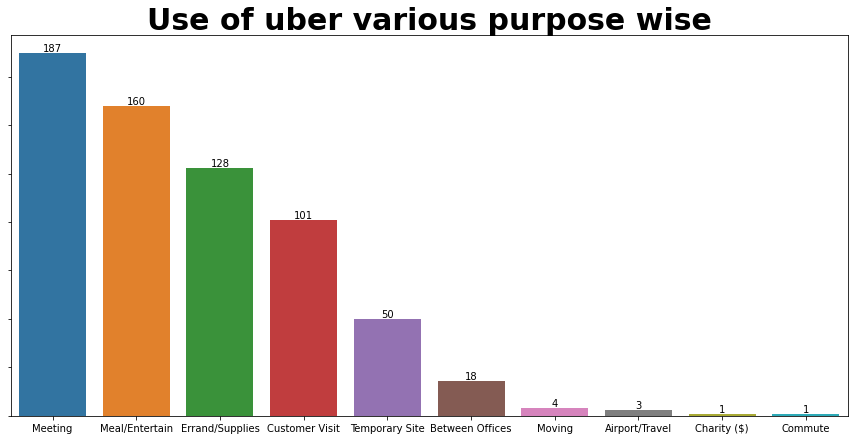

In [26]:
plt.figure(figsize = (15, 7))
count = sns.barplot(x=purpose_count.index, y=purpose_count.values,data=data)
plt.title('Use of uber various purpose wise',fontsize=30,fontweight='bold')
plt.gca().set_yticklabels([])
for bars in count.containers:
    count.bar_label(bars) 

In the presented plot, we have analyzed the distinct preferences of customers when choosing Uber rides for various purposes. 
The data reveals a clear pattern in customer choices. Notably, a significant portion of users tends to opt for Uber rides primarily for meetings, making it the most popular purpose. 
Additionally, the plot highlights other prevalent reasons for choosing Uber, such as entertainment, supplies, and customer visits. This insight into customer preferences provides valuable information for understanding the diverse needs and priorities of Uber users.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


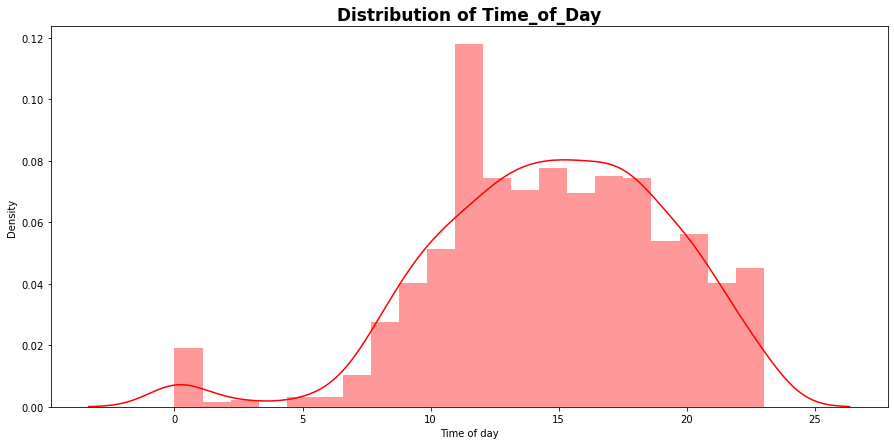

In [30]:
plt.figure(figsize= (15,7))
sns.distplot(x=data['TIME_OF_DAY'],color='red')
plt.title('Distribution of Time_of_Day',fontweight='bold',fontsize=17)
plt.xlabel("Time of day")
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


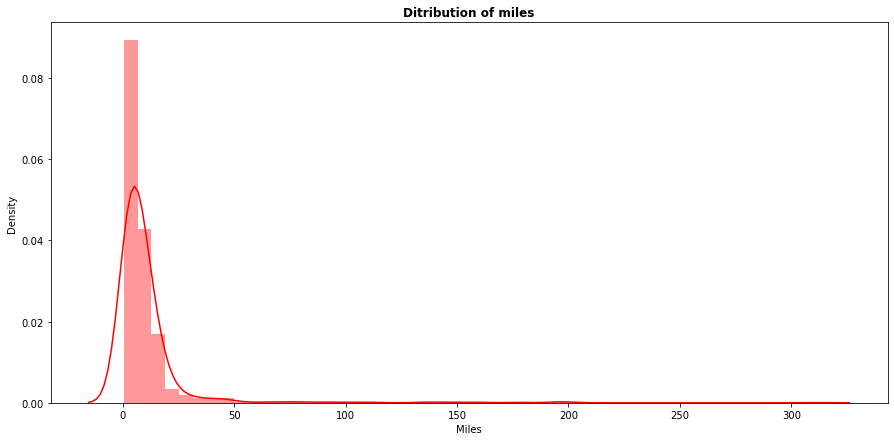

In [32]:
plt.figure(figsize=(15,7))
sns.distplot(x=data['MILES'],color='red')
plt.title('Ditribution of miles',fontweight='bold')
plt.xlabel('Miles')
plt.show()

In both provided distribution plots, the analysis indicates a distinct trend in user preferences for Uber rides. The data reveals that a significant number of people tend to favor scheduling rides predominantly between 11 am and 6 pm. Furthermore, the majority of customers exhibit a preference for rides covering an average distance of around 10 miles. This insight sheds light on the preferred time frames and travel distances that resonate most with Uber users

In [34]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'DURATION'],
      dtype='object')

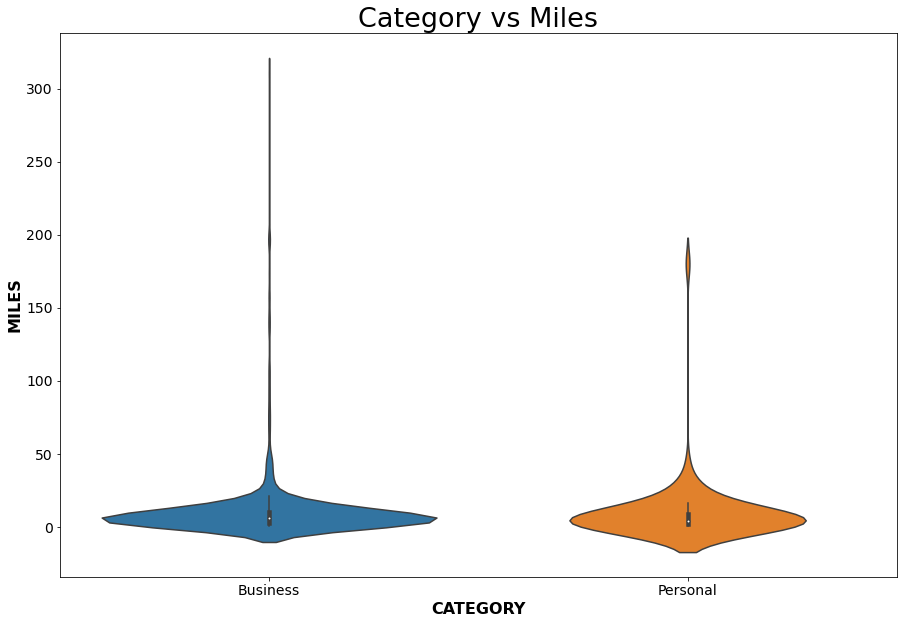

In [41]:
plt.figure(figsize = (15,10))
sns.violinplot(x='CATEGORY',y='MILES',data=data,fontsize=24)
plt.title('Category vs Miles',fontsize=27)
plt.xlabel('CATEGORY',fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('MILES',fontsize=16,fontweight='bold')
plt.show()

Above violin plot represent the distance covered by uber category wise & we conclude that customers like to taking uber ride for Business category rather than Personal use.

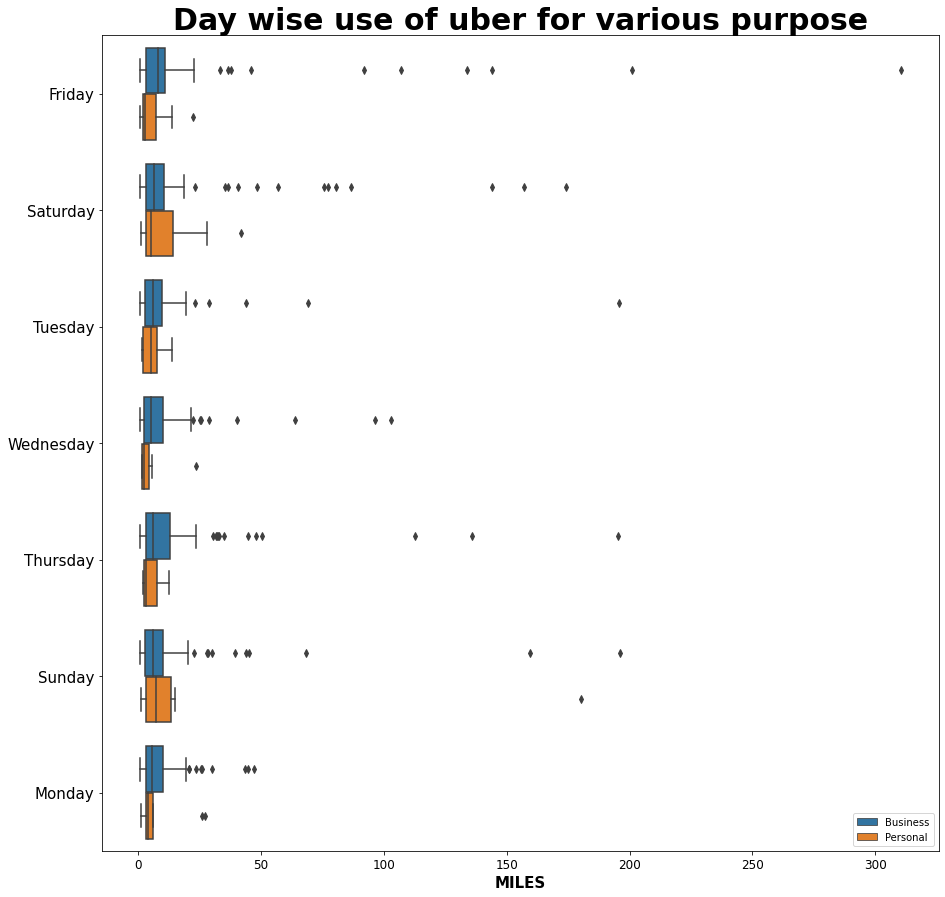

In [43]:
plt.figure(figsize  = (15,15))
sns.boxplot(x='MILES',y='DAY_OF_WEEK',data=data,hue='CATEGORY')
plt.legend(loc='best')
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel('MILES',fontsize=15,fontweight='bold')
plt.title('Day wise use of uber for various purpose',fontsize=30,fontweight='bold')
plt.show()

we can visually compare the distribution of `MILES` for each day of the week. also we can compare the `MILES` distribution between different trip categories `('Business' and 'Personal')`. The difference in the Day of the week is observed by the median value for different category level.

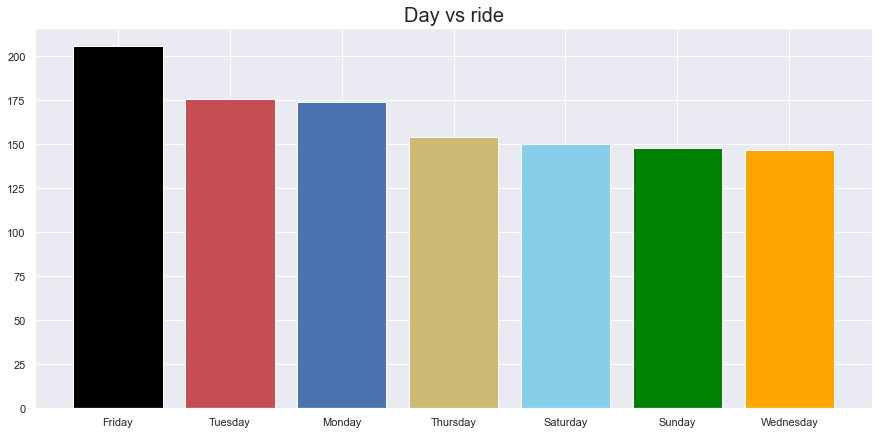

In [48]:
sns.set(rc={'figure.figsize':(15,7)})
day_of_week=['Friday','Tuesday','Monday','Thursday','Saturday','Sunday','Wednesday']
values=[206,176,174,154,150,148,147]
plt.bar(day_of_week,values,color=('black','r','b','y','skyblue','green','orange'))
plt.title("Day vs ride",fontsize=20)
plt.show()

The day-wise analysis of Uber ride data illustrates a clear trend in user demand. Among the days of the week, Friday emerges as the leader, with the highest number of ride requests. This suggests that people exhibit the maximum demand for Uber rides on Fridays, highlighting a distinct peak in user activity on this particular day.

<BarContainer object of 2 artists>

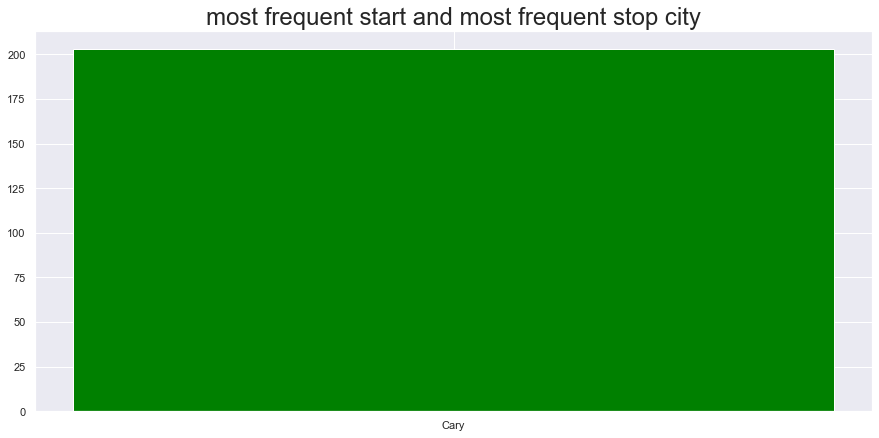

In [51]:
most_frequent_start=data['START'].mode().iloc[0]
most_frequent_stop=data['STOP'].mode().iloc[0]
locations = [most_frequent_start, most_frequent_stop]
counts = [data['START'].value_counts()[most_frequent_start], data['STOP'].value_counts()[most_frequent_stop]]
plt.title('most frequent start and most frequent stop city',fontsize=24)
plt.bar(locations, counts, color='green')

In [53]:
most_freq_start_city = data['START'].value_counts().sort_values(ascending = False).head()
most_freq_start_city

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START, dtype: int64

In [54]:
most_freq_stop_city = data['STOP'].value_counts().sort_values(ascending = False).head()
most_freq_stop_city

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: STOP, dtype: int64

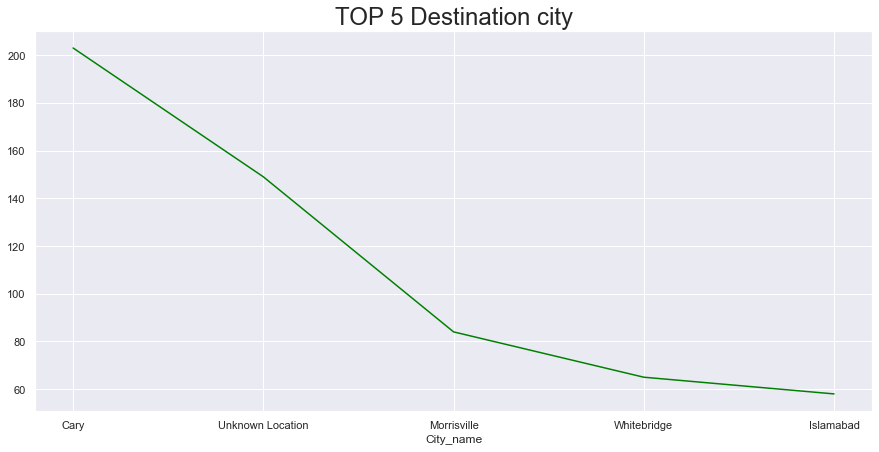

In [55]:
most_frequent_stop=['Cary','Unknown Location','Morrisville','Whitebridge','Islamabad']
no_of_time=[203,149,84,65,58]
data1=pd.DataFrame({'City_name':most_frequent_stop,'no_of_time':no_of_time})
sns.lineplot(x='City_name',y='no_of_time',data=data1,color='Green')
plt.ylabel('')
plt.title('TOP 5 Destination city',fontsize=24)
plt.show()

Our analysis indicates that "CARY" is both the most frequent starting and stopping city for Uber rides. Additionally, I have visualized the top 5 destination cities using a line graph, providing a clear representation of locations based on the frequency of rides. The graph allows for a straightforward interpretation of the popularity of these destinations, as indicated by the number of times they appear as Uber ride destinations

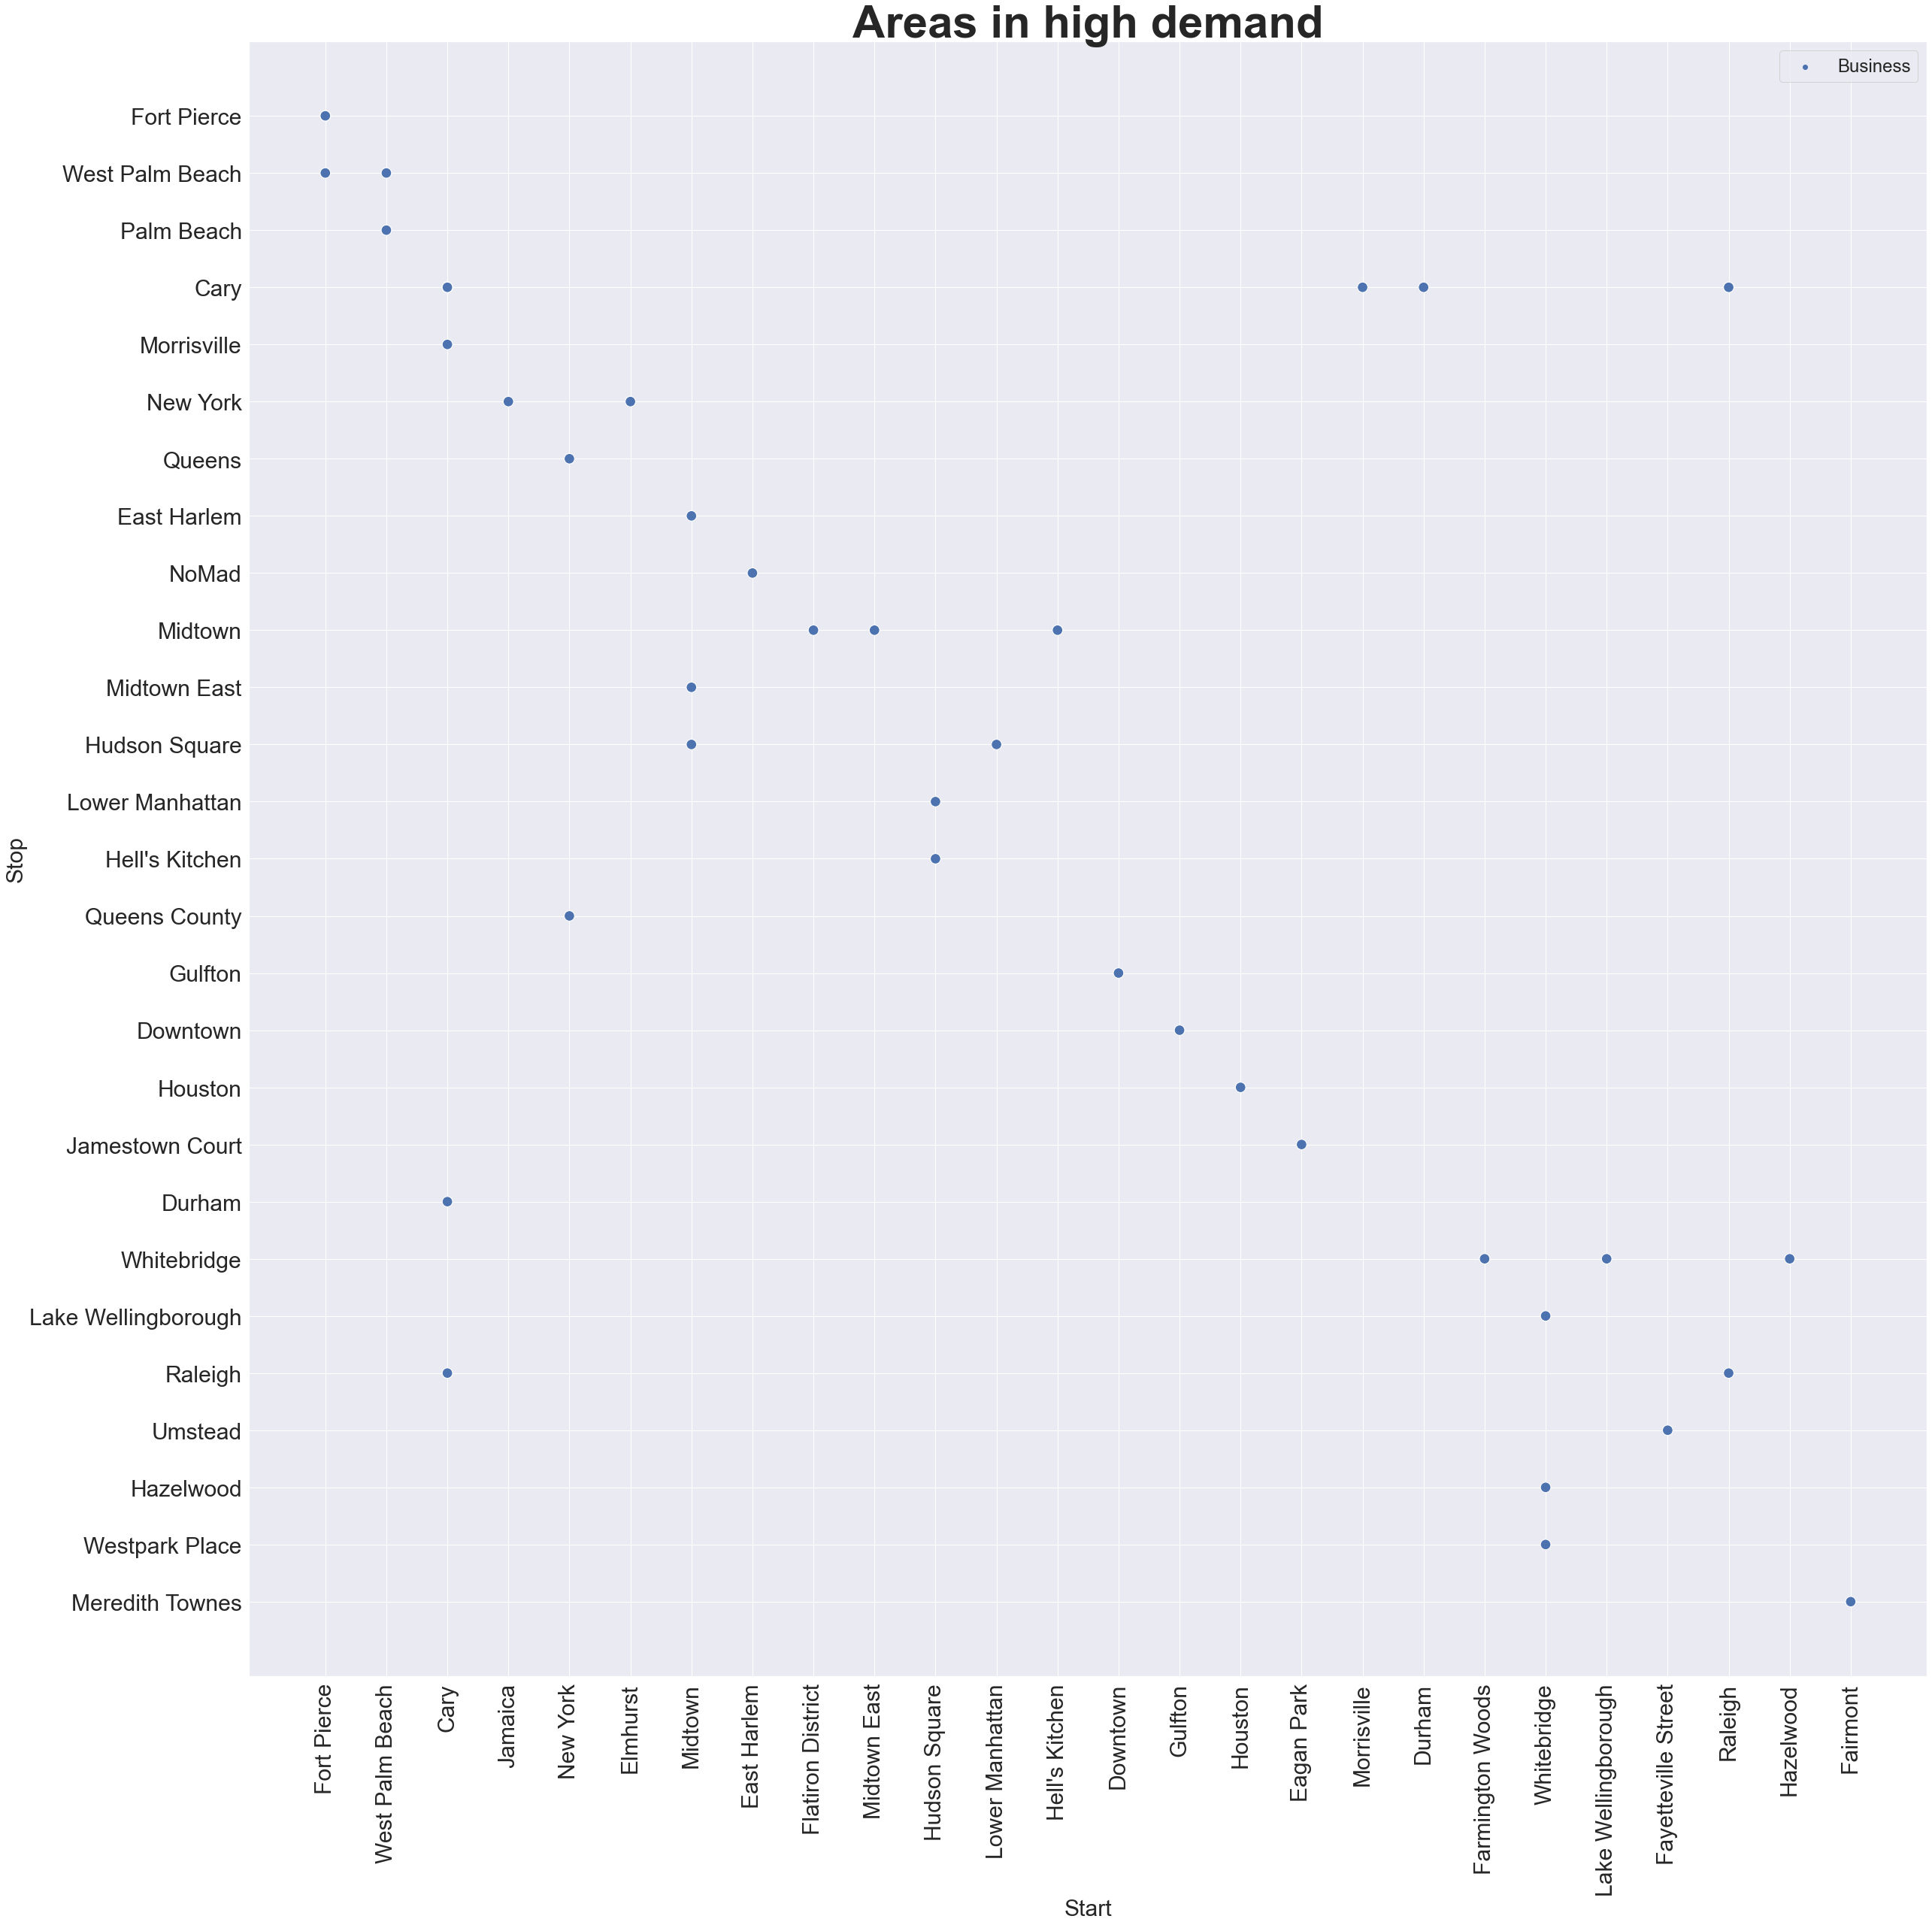

In [60]:
plt.figure(figsize=(40,40))
sns.scatterplot(data=data.head(50),x='START',y='STOP',hue='CATEGORY',s=190)
plt.legend(fontsize=24)
plt.xlabel('Start', fontsize=30) 
plt.ylabel('Stop', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xticks(rotation=90)
plt.title('Areas in high demand',fontsize=60,fontweight='bold')
plt.show()

The presented plot provides a visual representation of the areas with high demand for Uber rides, highlighting the most frequently used boarding and destination cities. By examining the plot, we can discern the cities that serve as major boarding points and those that are popular as destinations. This analysis enables us to categorize cities based on their demand for Uber services identifying areas with high, moderate, or low demand. Such insights are valuable for understanding the geographical distribution of Uber demand and can inform strategic decisions related to service allocation and resource management.


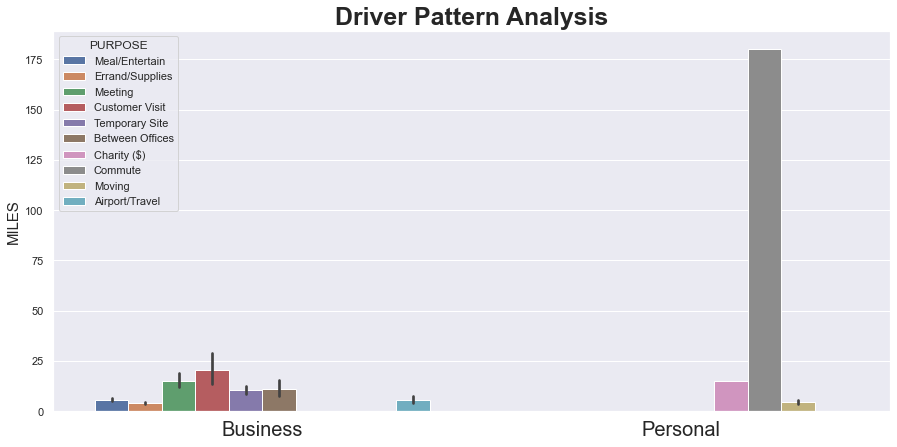

In [62]:
sns.barplot(x='CATEGORY',y='MILES',hue='PURPOSE',data=data)
plt.title('Driver Pattern Analysis',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20)
plt.ylabel('MILES',fontsize=15)
plt.xlabel('')
plt.show()

In the above plot, you can see that in the Business category, users have booked Uber for `Customer visits` the majority of the time. Similarly, in the Personal category, they have booked Uber for `commuting` purposes.